<a href="https://colab.research.google.com/github/m-ritam/OIBSIP/blob/main/UNEMPLOYMENT_ANALYSIS_WITH_PYTHON_Ritam_Maji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [ ]:
path1="/content/drive/MyDrive/Oasis Info/Unployment/Unemployment in India.csv"
path2="/content/drive/MyDrive/Oasis Info/Unployment/Unemployment_Rate_upto_11_2020.csv"
unemployment_data = pd.read_csv(path1)
unemployment_covid_data=pd.read_csv(path2)

In [ ]:
unemployment_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
unemployment_covid_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
unemployment_data= unemployment_data.dropna()  #removing Null values

In [ ]:
unemployment_data.columns


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
unemployment_covid_data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

**Analysis**

<ipython-input-16-33957067cf8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds1 = unemployment_data.corr()


<Axes: >

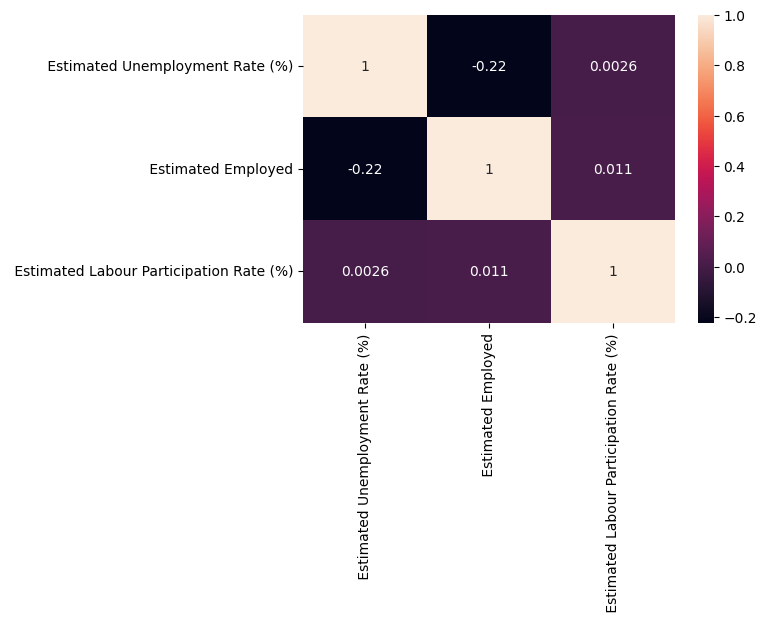

In [ ]:
plt.figure(figsize=(6,4))
ds1 = unemployment_data.corr()
sns.heatmap(ds1, annot=True)

<ipython-input-17-b392077d7319>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds2 = unemployment_covid_data.corr()


<Axes: >

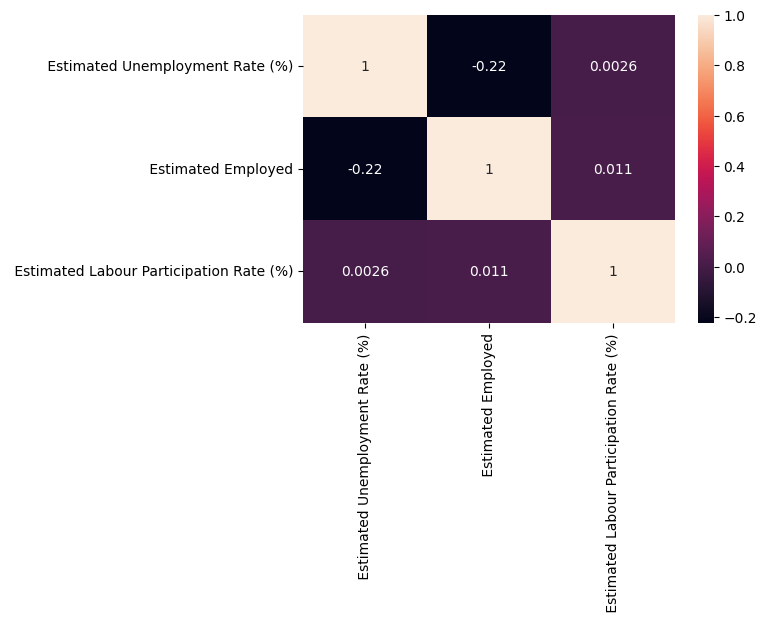

In [ ]:
plt.figure(figsize=(6,4))
ds2 = unemployment_covid_data.corr()
sns.heatmap(ds1, annot=True)

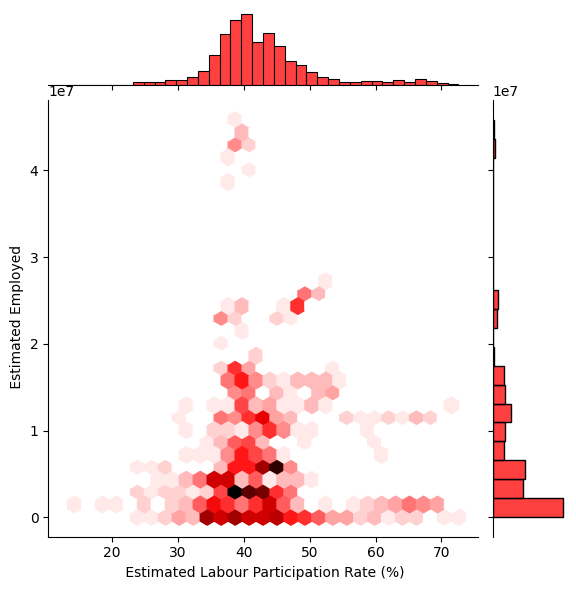

In [ ]:
sns.jointplot(x= ' Estimated Labour Participation Rate (%)', y=' Estimated Employed', data=unemployment_data, kind='hex',color='red')


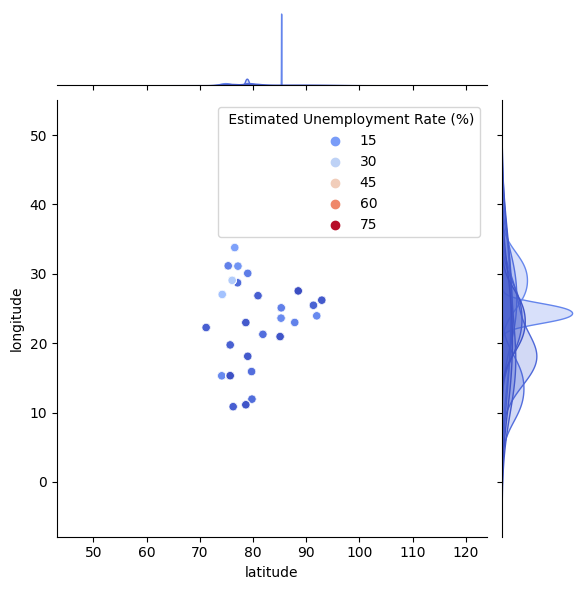

In [ ]:
sns.jointplot(x='latitude', y='longitude', data=unemployment_covid_data, hue=" Estimated Unemployment Rate (%)", kind="scatter", palette='coolwarm')

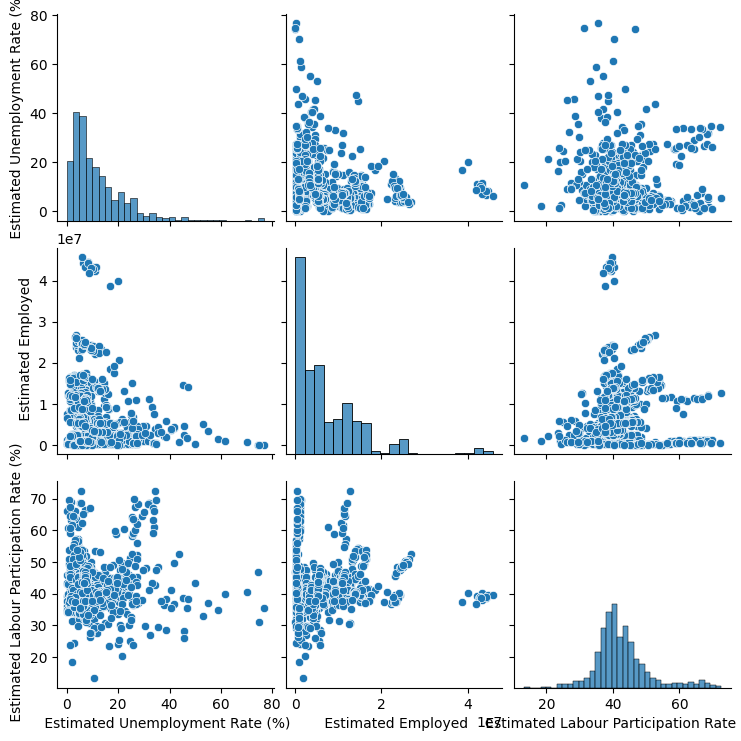

In [ ]:
sns.pairplot(unemployment_data)

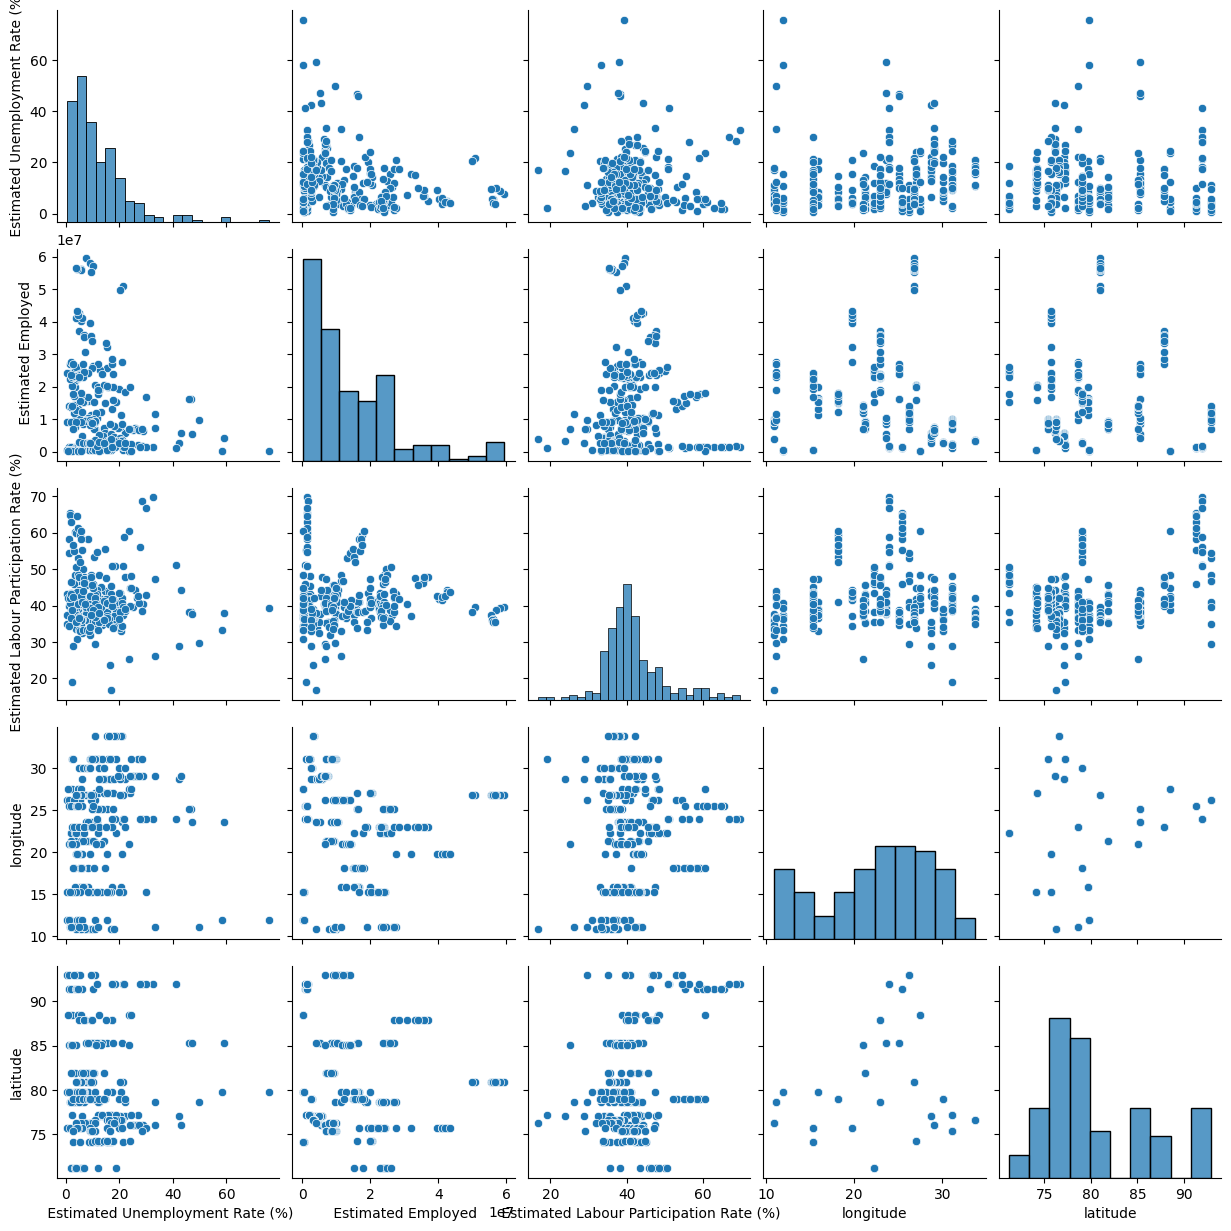

In [ ]:
sns.pairplot(unemployment_covid_data)

<ipython-input-22-e2c98c9e1939>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data = unemployment_data.groupby('Region').sum()


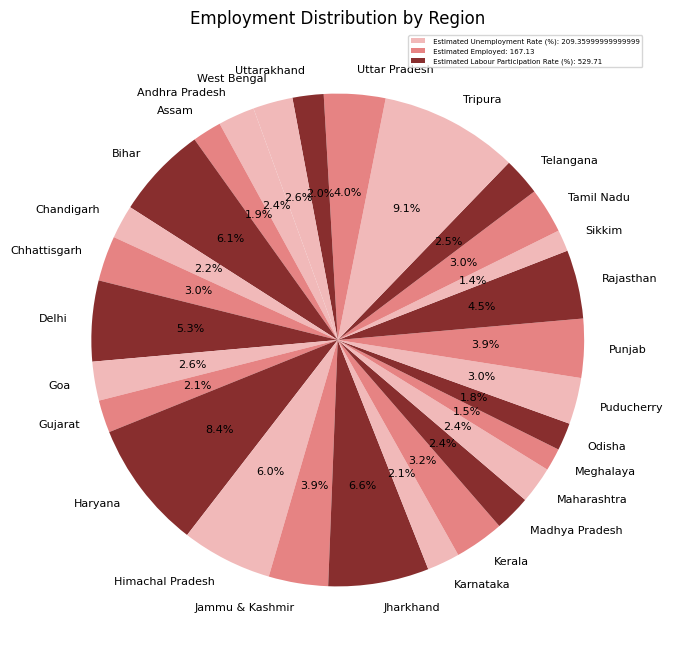

In [ ]:
region_data = unemployment_data.groupby('Region').sum()

fig, ax = plt.subplots(figsize=(20, 8))
colors = ["#f1b9b9", "#e68383", "#882e2e"]
ax.pie(region_data[' Estimated Unemployment Rate (%)'], labels=region_data.index, autopct='%1.1f%%', startangle=110,textprops={'fontsize':8}, colors = colors)
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_data, region_data[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region')
plt.show()


<ipython-input-23-d871a09d4a21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data1 = unemployment_covid_data.groupby('Region').sum()


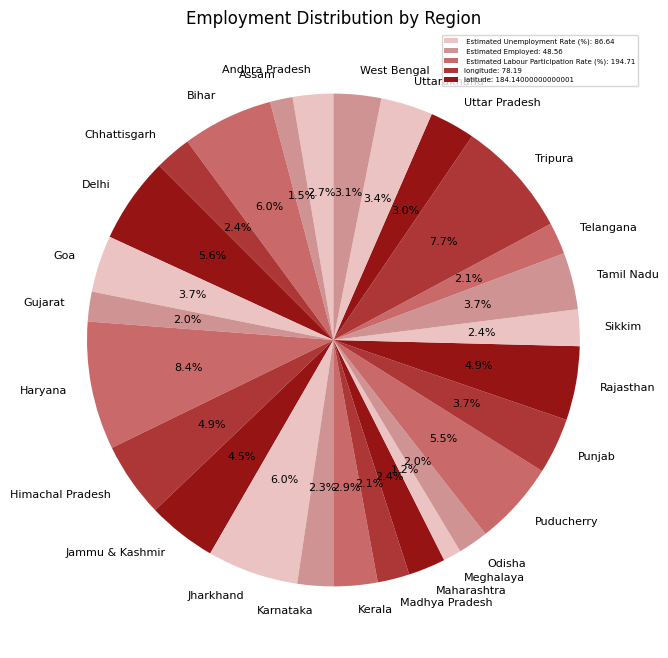

In [ ]:
region_data1 = unemployment_covid_data.groupby('Region').sum()

fig, ax = plt.subplots(figsize=(20, 8))
colors = ["#ebc3c3", "#cf9393", "#c96969", "#ad3737", "#961414"]
ax.pie(region_data1[' Estimated Unemployment Rate (%)'], labels=region_data1.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8}, colors = colors)
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_data1, region_data1[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region')
plt.show()

<ipython-input-24-ce7494ad6118>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = unemployment_data.groupby(["Region", " Date"]).sum()


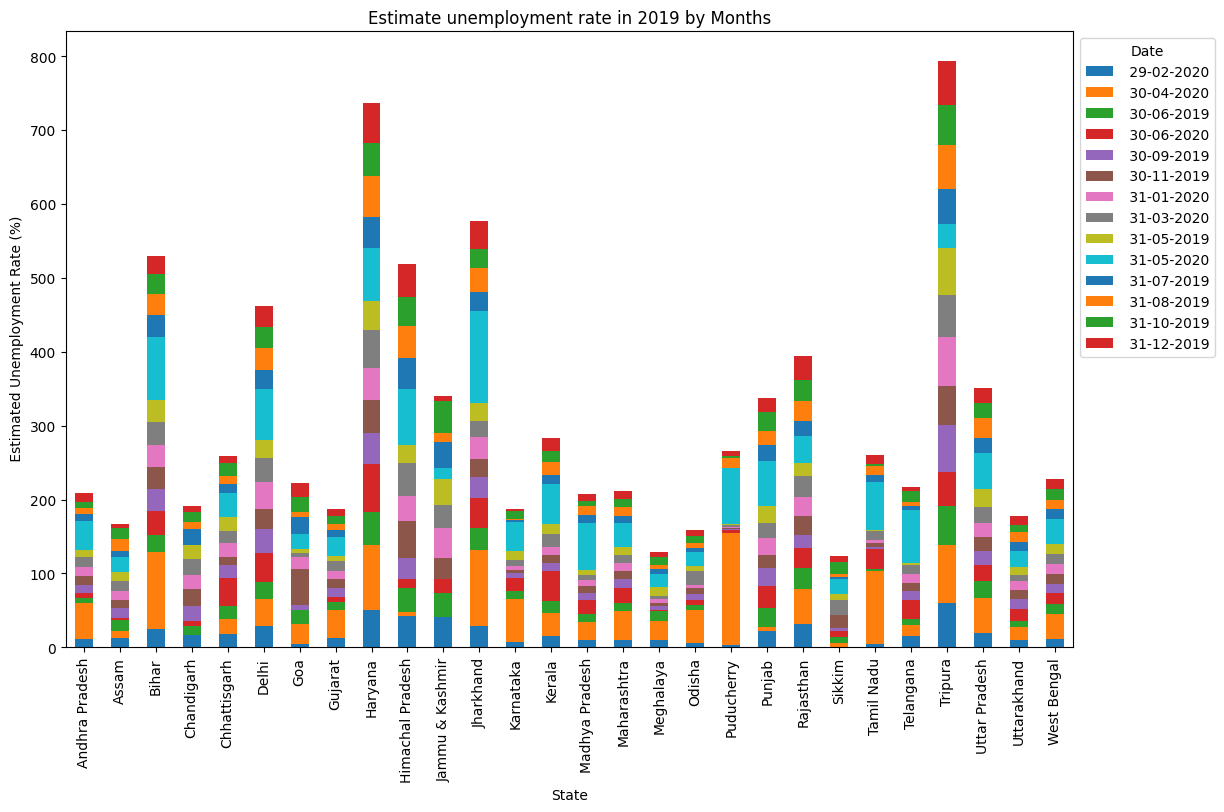

In [ ]:
grouped_df = unemployment_data.groupby(["Region", " Date"]).sum()

fig, ax = plt.subplots(figsize=(13,8))
grouped_df[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel("State")
plt.title('Estimate unemployment rate in 2019 by Months')

ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

plt.show()

<ipython-input-25-80459a3d5d84>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = unemployment_covid_data.groupby(["Region", " Date"]).sum()


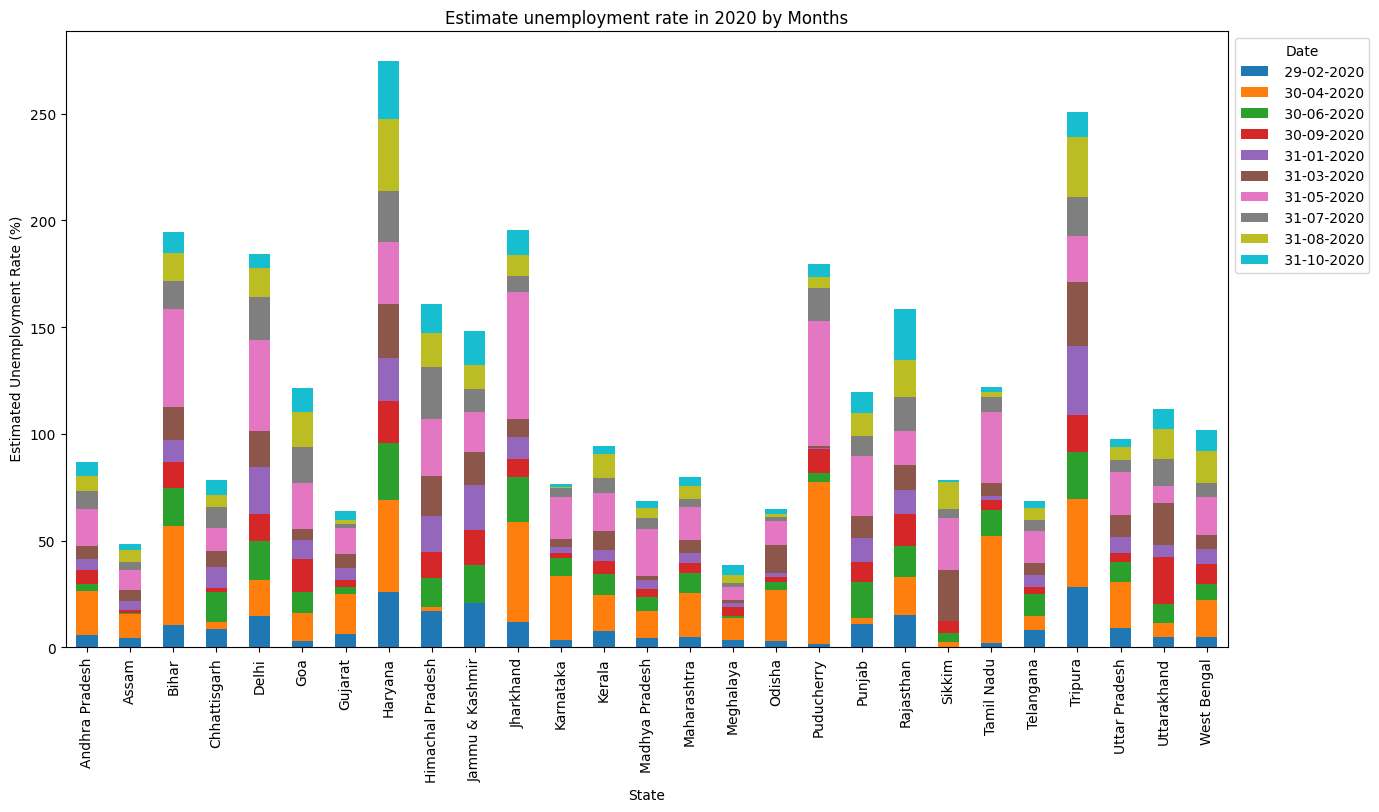

In [ ]:
grouped_df1 = unemployment_covid_data.groupby(["Region", " Date"]).sum()

fig, ax = plt.subplots(figsize=(15,8))
grouped_df1[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel("State")
plt.title('Estimate unemployment rate in 2020 by Months')

ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

plt.show()

[Text(0, 0, 'Andhra Pradesh'),
 Text(1, 0, 'Assam'),
 Text(2, 0, 'Bihar'),
 Text(3, 0, 'Chhattisgarh'),
 Text(4, 0, 'Delhi'),
 Text(5, 0, 'Goa'),
 Text(6, 0, 'Gujarat'),
 Text(7, 0, 'Haryana'),
 Text(8, 0, 'Himachal Pradesh'),
 Text(9, 0, 'Jammu & Kashmir'),
 Text(10, 0, 'Jharkhand'),
 Text(11, 0, 'Karnataka'),
 Text(12, 0, 'Kerala'),
 Text(13, 0, 'Madhya Pradesh'),
 Text(14, 0, 'Maharashtra'),
 Text(15, 0, 'Meghalaya'),
 Text(16, 0, 'Odisha'),
 Text(17, 0, 'Puducherry'),
 Text(18, 0, 'Punjab'),
 Text(19, 0, 'Rajasthan'),
 Text(20, 0, 'Sikkim'),
 Text(21, 0, 'Tamil Nadu'),
 Text(22, 0, 'Telangana'),
 Text(23, 0, 'Tripura'),
 Text(24, 0, 'Uttar Pradesh'),
 Text(25, 0, 'Uttarakhand'),
 Text(26, 0, 'West Bengal')]

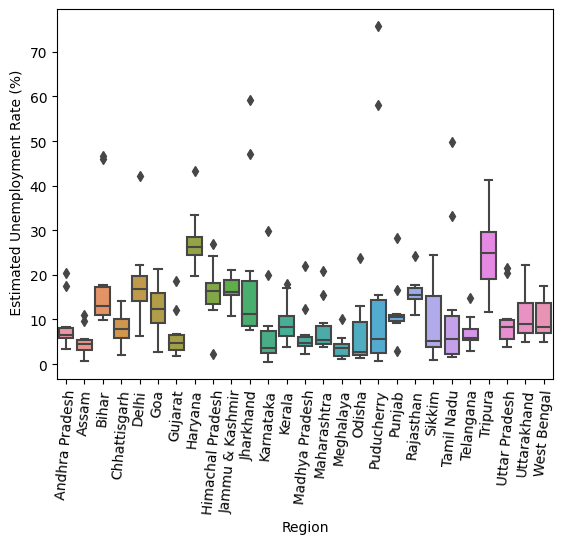

In [ ]:
g=sns.boxplot(data=unemployment_covid_data, x='Region', y=' Estimated Unemployment Rate (%)')
g.set_xticklabels(g.get_xticklabels(), rotation=85)

In [ ]:
x_regions = np.array(unemployment_data['Region'])
x_regions_cov = np.array(unemployment_covid_data['Region'])
y_unp = np.array(unemployment_data[' Estimated Labour Participation Rate (%)'])
y_unp_covid = np.array(unemployment_covid_data[' Estimated Labour Participation Rate (%)'])

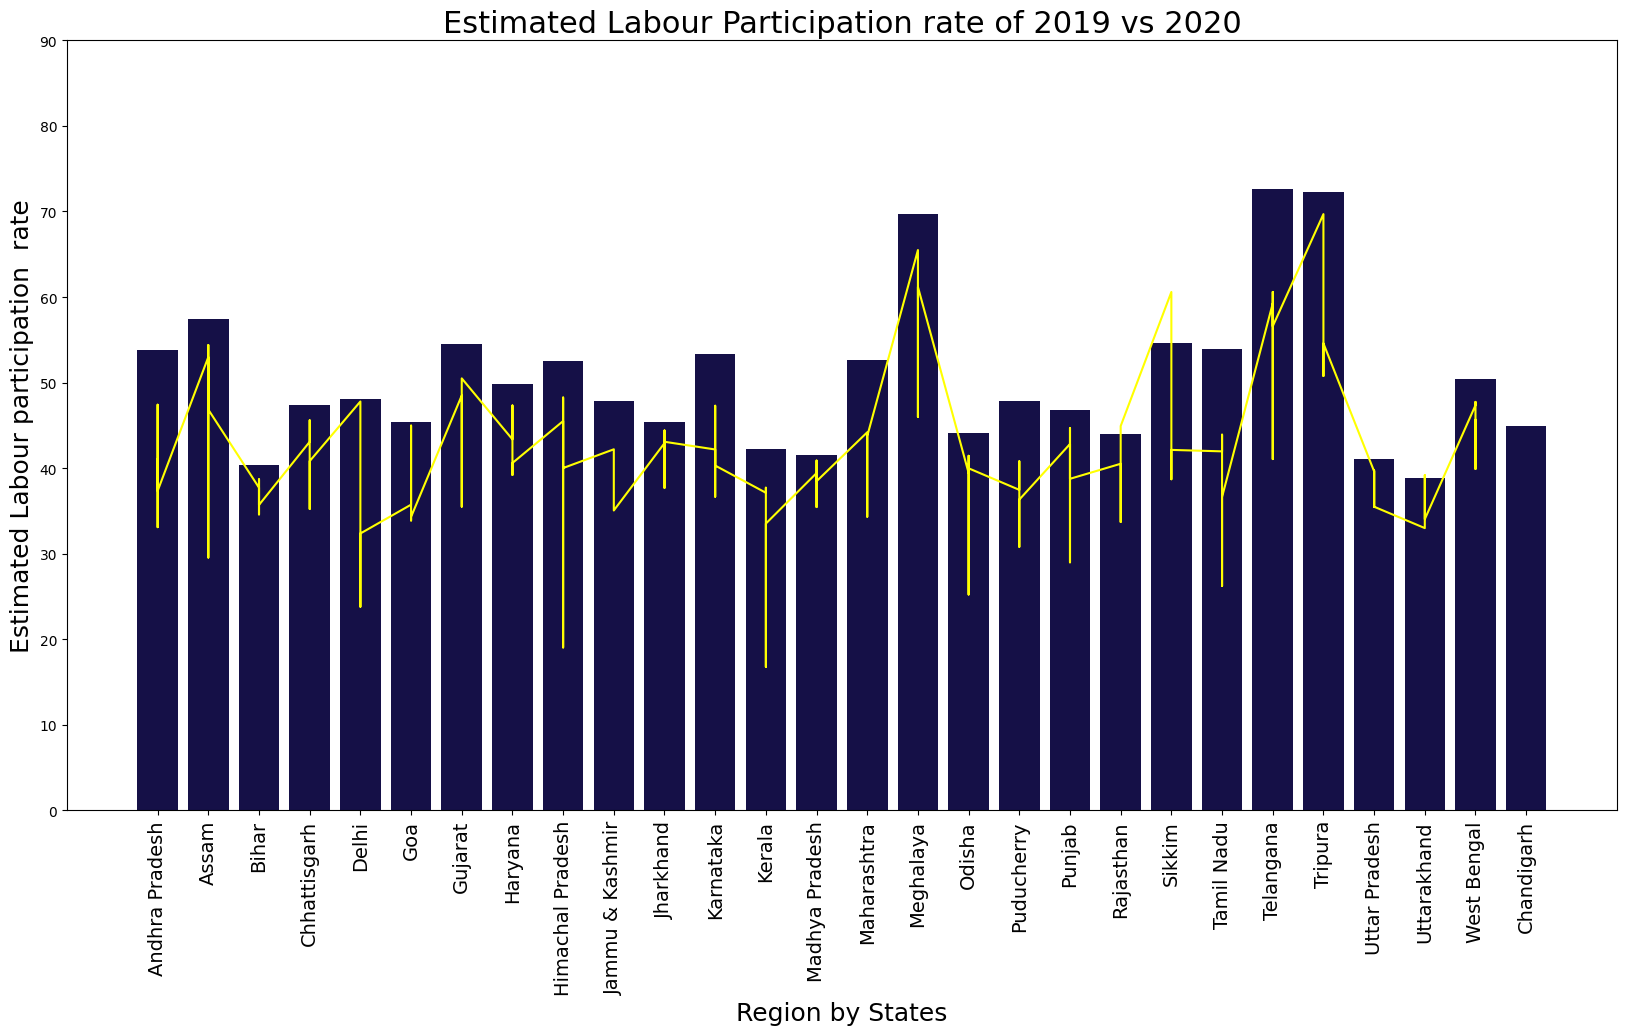

In [ ]:
fig = plt.figure(figsize=(20, 10))

plt.bar(x_regions, y_unp, color= '#151047')
plt.plot(x_regions_cov, y_unp_covid, color= 'yellow')
plt.ylim(0, 90)

labels = sorted(set(unemployment_data['Region']))
plt.xticks(labels, rotation='vertical',fontsize=14)

plt.xlabel('Region by States',fontsize=18)
plt.ylabel('Estimated Labour participation  rate',fontsize=18)
plt.title('Estimated Labour Participation rate of 2019 vs 2020',fontsize=22)

plt.show()